In [1]:
import numpy as np
import torch
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.path as mpath
import sys
sys.path.append('/remote/tychodata/ftairli/work/Projects/HexConvTest/Models')

In [2]:
plt.rcParams['figure.figsize'] = [15, 12]

In [3]:
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device = torch.device('cpu')


X_test = torch.load('../Data/NormData/X_test.pt').to(device)
Xmax_test = torch.load('../Data/NormData/Y_Xmax_test.pt').to(device)


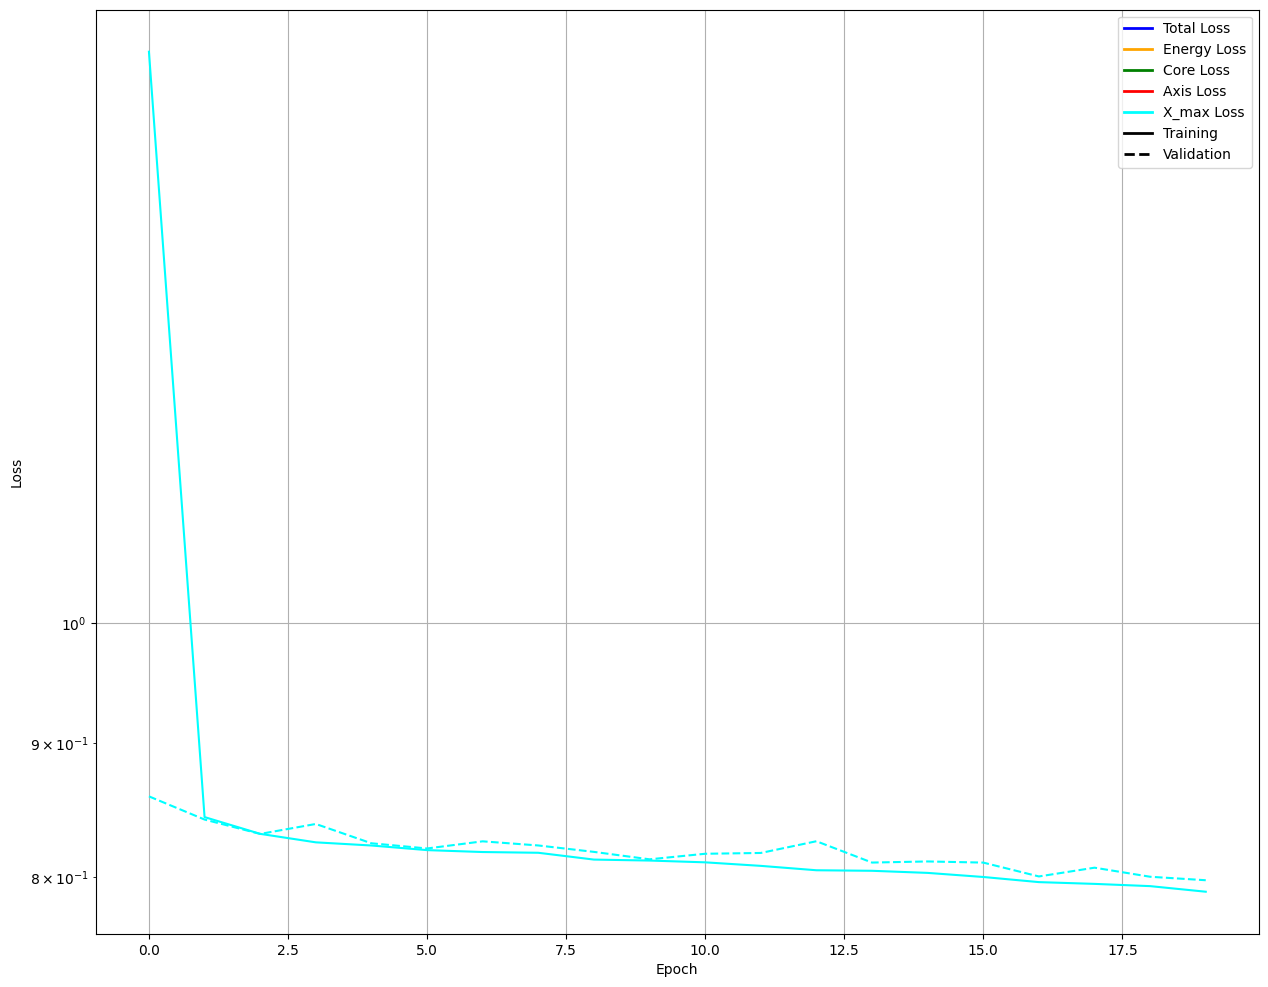

In [4]:
model = torch.load('../Models/Model_X_0.pt')

X_loss = np.asarray(model.T_Loss_history)

X_loss_val = np.asarray(model.T_Loss_history_val)

# Define colors
colors = ['blue', 'orange', 'green', 'red','cyan']

# Plot training loss
plt.plot(X_loss, color=colors[4], label='Xmax Loss - Training')

# Plot validation loss
plt.plot(X_loss_val, color=colors[4], linestyle='dashed', label='Xmax Loss - Validation')

# Set up custom legend

custom_lines = [Line2D([0], [0], color=colors[0], lw=2),
                Line2D([0], [0], color=colors[1], lw=2),
                Line2D([0], [0], color=colors[2], lw=2),
                Line2D([0], [0], color=colors[3], lw=2),
                Line2D([0], [0], color=colors[4], lw=2),
                Line2D([0], [0], color='black', lw=2),
                Line2D([0], [0], color='black', linestyle='dashed', lw=2)]

plt.legend(custom_lines, ['Total Loss', 'Energy Loss', 'Core Loss', 'Axis Loss','X_max Loss', 'Training', 'Validation'])

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.yscale('log')
plt.grid()
plt.show()


In [5]:
Xmax_pred = torch.zeros(size = (X_test.shape[0],1))

for i in range(94):
    indices = np.arange(i*1000, (i+1)*1000)
    # print(indices)
    print(f'\r {i}', end='')
    Xmax_pred[indices] = model(X_test[indices])
        
indices = np.arange(94000, X_test.shape[0])
Xmax_pred[indices] =model(X_test[indices])


del model
print()
print(Xmax_pred.shape)

 93
torch.Size([94549, 1])


In [6]:
# Normalise the values:

Xmax_MEAN     = 750.0
Xmax_STD      = 66.80484050442804 
GlobalTimeSTD = 4094.8664907986326 # dont need to include seconds, as they are always same for simulations
E_MEAN        = 19.0
Norm_LEN      = 750.0
Norm_SIG      = np.log10(10+1) # Normalise for unity at 100 vem + for log10

Xmax_pred = Xmax_pred*Xmax_STD + Xmax_MEAN
Xmax_test = Xmax_test*Xmax_STD + Xmax_MEAN

Xmax_pred = Xmax_pred.cpu().detach().numpy()
Xmax_test = Xmax_test.cpu().detach().numpy()


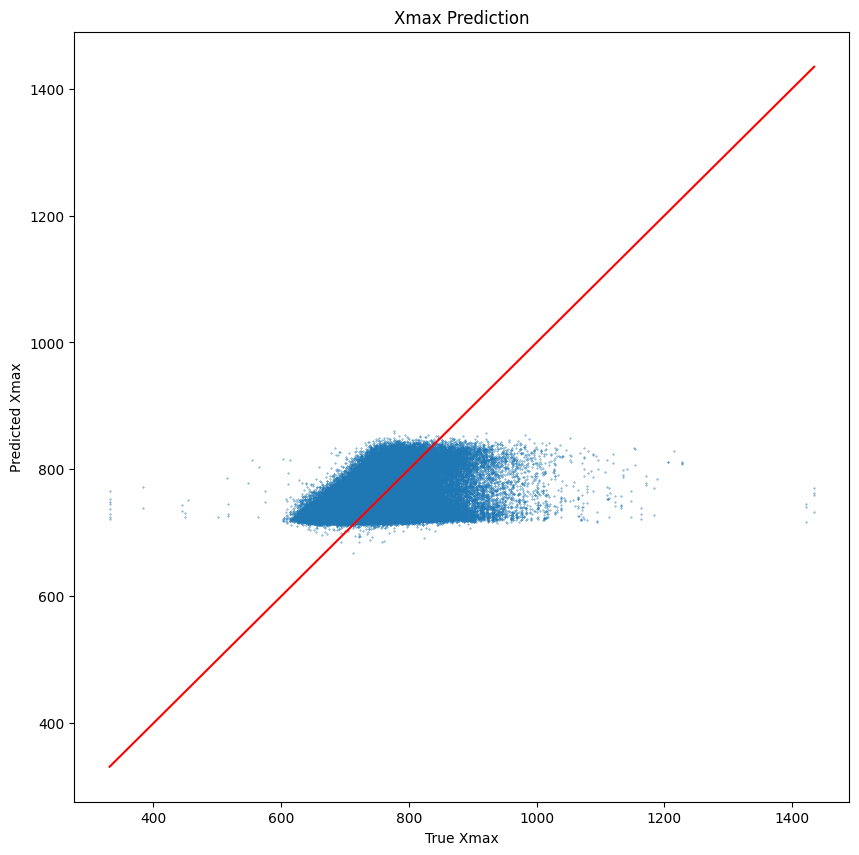

In [8]:
plt.figure(figsize=(10,10))
plt.scatter(Xmax_test,Xmax_pred,s=0.1)
plt.plot([min(Xmax_test), max(Xmax_test)], [min(Xmax_test), max(Xmax_test)], color='red')  # ideal line
plt.xlabel('True Xmax')
plt.ylabel('Predicted Xmax')
plt.title('Xmax Prediction')
plt.show()